<a href="https://colab.research.google.com/github/Nagasai122/salesprediction/blob/main/Rossmann_Sales_Prediction_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



\##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Arun Prasanth
##### **Team Member 2 -**Shabnam
##### **Team Member 3 -** Naga Sai


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


##Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

## You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np

# Importing for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Datatime 
from datetime import datetime

# Importing warnings to import
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

### Dataset Loading

In [ ]:
# Load Dataset
sales_df = pd.read_csv("/content/drive/MyDrive/Data & Resources/Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/Data & Resources/store.csv")

### Dataset First View

In [ ]:
# Dataset First Look
sales_df.head()

In [ ]:
store_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
sales_df.shape

In [ ]:
store_df.shape

### Dataset Information

In [ ]:
# Dataset Info
sales_df.describe(include='all')

In [ ]:
store_df.describe(include='all')

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates_sales_df= sales_df[sales_df.duplicated()]
duplicates_sales_df

In [ ]:
duplicates_store_df= store_df[store_df.duplicated()]
duplicates_store_df

Observation:
 No duplicates found in the two data sets provided

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
sales_df.info()

Observation:

*   In the sales dataset, we are fortunate enough to get the dataset with 0 null values in the features
*   We provided with '1017209' rows and '9' features

In [ ]:
store_df.info()

Observation:

*   In store dataset we provided with 1115 rows and 10 features
*   few features come up with null values, which we are going to treat.


In [ ]:
# finding feature wise percentage missing values
missing_values_percentage = round((store_df.isna().sum().sort_values(ascending=False)/len(store_df))*100,2)
missing_values_percentage

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
plt.title("Percentage missing values per column",fontsize=15)

a=sns.barplot(x=missing_values_percentage[missing_values_percentage>0],y=missing_values_percentage[missing_values_percentage>0].index)
a.set_ylabel('Column Name')
a.set_xlabel('Percentage Missing Values')
plt.show()

* The Percentage of Null values in each feature in the sales dataset has been shown above.
* Feature CompetitionDistance with less than 1% null values
* It shows that features such as CompetitionOpenSinceMonth, CompetitionOpenSinceYear consists of around 30% null values.
* Promo2SinceYear, Promo2SinceWeek, PromoInterval are the features with the 50% of null values in respective entities.


Hence, we should deal with the null values by various methods before proceeding further.

### Dealing with Null values

In [ ]:
# Distribution plot for the competition distance

plt.subplots(figsize=(10, 6))
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel("Stores")
plt.ylabel("Competition Distance")

* As we already known that "CompetitionDistance" is the distance in meters to the nearest competitors.
* Hence distance of each store from the competitor will be seen using **"Distribution Plot"**

In a skewed distribution, the median is often a preferred measure of central tendency, as the mean is not usually in the middle of the distribution

In [ ]:
# Filling the null values in "competition distance" feature with "Median"

a_type_median = round(store_df.loc[(store_df["StoreType"]=='a'),'CompetitionDistance'].median(),1)
b_type_median = round(store_df.loc[(store_df["StoreType"]=='b'),'CompetitionDistance'].median(),1)
c_type_median = round(store_df.loc[(store_df["StoreType"]=='c'),'CompetitionDistance'].median(),1)
d_type_median = round(store_df.loc[(store_df["StoreType"]=='d'),'CompetitionDistance'].median(),1)

print("The median Compeition Distance for stores of type a is " + str(a_type_median))
print("The median Compeition Distance for stores of type b is " + str(b_type_median))
print("The median Compeition Distance for stores of type c is " + str(c_type_median))
print("The median Compeition Distance for stores of type d is " + str(d_type_median))

store_df.loc[store_df["StoreType"]=='a']= store_df.loc[store_df["StoreType"]=='a'].fillna(value={'CompetitionDistance': a_type_median})
store_df.loc[store_df["StoreType"]=='b']= store_df.loc[store_df['StoreType']=='b'].fillna(value={"CompetitionDistance": b_type_median})
store_df.loc[store_df["StoreType"]=='c']= store_df.loc[store_df['StoreType']=='c'].fillna(value={"CompetitionDistance": c_type_median})
store_df.loc[store_df["StoreType"]=='d']= store_df.loc[store_df['StoreType']=='d'].fillna(value={"CompetitionDistance": d_type_median})

In [ ]:
store_df.info()

In [ ]:
#Distribution Plot for "Competition open since month"

plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceMonth"].value_counts())

In [ ]:
store_df["CompetitionOpenSinceYear"].value_counts()

In [ ]:
#Distribution Plot for "Competition open since year"

plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceYear"].value_counts())

* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Considering the Above two distribution, I choose to impute the null values by calcuating the **"Mean"** as the central tendency measure for both this features.
* Also we simply say, competition for the stores in general are peak for few and low for very few stores.
* Hence we dealing with the mean values for treating the null.

In [ ]:
# Filling the null values in the feature "Competiton open since month/year" with "mean" values.

store_df["CompetitionOpenSinceMonth"].fillna(round(store_df["CompetitionOpenSinceMonth"].mean()), inplace =True)
store_df["CompetitionOpenSinceYear"].fillna(round(store_df["CompetitionOpenSinceYear"].mean()), inplace =True)

In [ ]:
store_df.info()

* For other three features, we just replacing the null values by "0"
* Assuming the if the Promotion since detail not given, then we considering there is no promotions in the store.

In [ ]:
# Filling the null values in "Promotion" related features with "0"

store_df["Promo2SinceWeek"].fillna(value = 0 , inplace = True)
store_df["Promo2SinceYear"].fillna(value = 0 , inplace = True)
store_df["PromoInterval"].fillna(value = 0 , inplace = True)

In [ ]:
# Checking the percentage of null values in the store dataframe

(round(store_df.isnull().sum()/(store_df.shape[0]),4)*100)


* Hence, Both the dataset has been cleaned without null values in the entities of the features
* we shall now proceed for the merging of the two dataset

In [ ]:
##Merging of Two Source Dataset

df = sales_df.merge(right = store_df, on= "Store", how = "left")  

In [ ]:
df.shape

In [ ]:
df.head()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.


# Sorting out the categorical features from the dataset

categorical_features = []
for i in df.columns:
  a = df[i].value_counts()
  if len(a) < 600:
    categorical_features.append(i)
print(categorical_features)

for col in categorical_features:
  values = df[col].unique()
  print(f"The Unique categorical values of the feature {col} is {values}")
  print("\n")

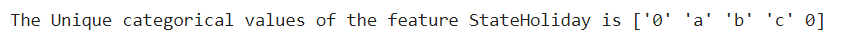

* It is noted that "0" provided as the string datatype
* It's nessasary to change it into integer datatype.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Before changing
df["StateHoliday"].unique()

In [ ]:
# After Replacing the "0" with integer 0
df["StateHoliday"].replace({"0":0}, inplace = True)
df["StateHoliday"].unique()

In [ ]:
df['CompetitionDistance'] = df['CompetitionDistance'].astype(int)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(int)
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(int)
df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d",errors='raise')

In [ ]:
df.info()

In [ ]:
df["Date"]

In [ ]:
df_dummy = df.copy()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***